In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from my_class import ArtificialBeeColony


In [77]:
def himmelblau(x: np.ndarray or list) -> float:
    """ Function for evaluating the Himmelblau function.
    
    Parameters:
    -----------
        x: np.ndarray or list
    
    Returns:
    --------
        result: float

     """
    result = np.power((np.power(x[0],2)+x[1]-11),2)+np.power((x[0]+np.power(x[1],2)-7),2)
    return result

def grid_division(Splits_pr_dimension: int, Dimensions_bounds: np.ndarray) -> list[np.ndarray]:
    """Function for partitioning N-dimensional square into
       smaller squares, i.e. a grid

    Parameters:
    -----------
        Splits_pr_dimension : int 
        Dimensions_bounds   : np.ndarray of shape (Nr_dimensions, 2)
    
    Returns:
    --------

        grids: list of np.ndarray, e.g. each array in list is of
                                   same type as 'Dimensions_bounds'
       """
    from itertools import product
    _Nr_splits_pr_dimension = Splits_pr_dimension
    partitions = []
    for d, dimension in enumerate(Dimensions_bounds):
        lower, upper = dimension[0], dimension[1]
        step_size    = (upper - lower) /  _Nr_splits_pr_dimension
        splits = []
        for split in range(_Nr_splits_pr_dimension):
            my_split = [lower + step_size * split, lower + step_size * (split + 1)] 
            splits.append(my_split)
        partitions.append(splits)
    grids = [np.array(list(grid)) for grid in product(*partitions)]
    return grids      

In [106]:
## Parameters for simulation 
f = himmelblau

Nr_bees  = 100
Nr_iterations = 20

x_lower, x_upper = -6, 6
y_lower, y_upper = -6, 6
Max_trial_count = 10

dimensions_bounds = np.array([[x_lower, x_upper],[y_lower, y_upper]])

Divisions_pr_dimension = 1


In [107]:
if Divisions_pr_dimension > 1:
    bounds = grid_division(Divisions_pr_dimension,Dimensions_bounds=dimensions_bounds)
    solutions = []
    for bound in bounds:
        my_sim = ArtificialBeeColony(func = f, Dimensions_bounds = bound, Nr_bees = Nr_bees, \
                                Nr_iterations = Nr_iterations, Max_trial_count = Max_trial_count)
        my_sim.simulate()
        solutions.append(my_sim.BestFoodSoure)
else: 
    my_sim = ArtificialBeeColony(func = f, Dimensions_bounds = dimensions_bounds, Nr_bees = Nr_bees, \
                                Nr_iterations = Nr_iterations, Max_trial_count = Max_trial_count)
    my_sim.simulate()
    solutions = [my_sim.BestFoodSoure]


---------- Performing cycles ----------


100%|██████████| 20/20 [00:00<00:00, 339.76it/s]


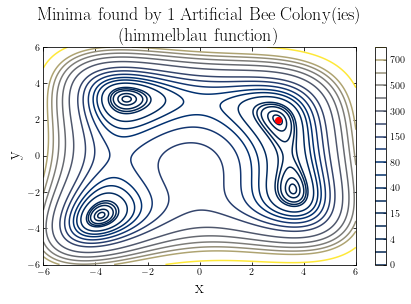

In [108]:
## Defining plot ##
fig, ax = plt.subplots(1,1,figsize = (7,4))

plt.rc('text', usetex=True)
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

xlims = [dimensions_bounds[0][0],dimensions_bounds[0][1]]
ylims = [dimensions_bounds[1][0],dimensions_bounds[1][1]]
ax.set_xlim(xlims[0],xlims[1]), ax.set_ylim(ylims[0],ylims[1])
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)

nr = 1
if Divisions_pr_dimension > 1: nr = Divisions_pr_dimension * dimensions_bounds.shape[0]
ax.set_title(f'Minima found by {nr} Artificial Bee Colony(ies) \n  ({f.__name__} function)',size=18)

## Determining levels in function: i.e. Z = 0, 1, 4, 10.... ##
levels = [0,1,4,10,15,20,40,60,80,110,150,200,300,400,500,600,700,1000]

## Setting values for  contourplot ##
xlist = np.linspace(xlims[0],xlims[1],1000)
ylist = np.linspace(ylims[0],ylims[1],1000)
X, Y = np.meshgrid(xlist,ylist)
Z = np.power((np.power(X,2)+Y-11),2)+np.power((X+np.power(Y,2)-7),2)

## Plotting ##
contour_plot = ax.contour(X,Y,Z, levels, antialiased=True,cmap = 'cividis')
fig.colorbar(contour_plot)
for solution in solutions:
    ax.plot(solution[0],solution[1],'ro')
plt.show()

## Animation of simulation

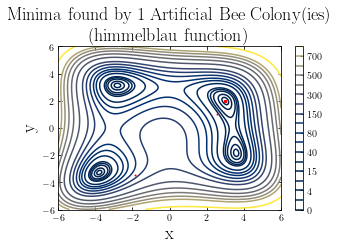

In [110]:

fig, ax = plt.subplots(1,1,figsize = (5,3))
nr = 1
if Divisions_pr_dimension > 1: nr = Divisions_pr_dimension * dimensions_bounds.shape[0]
ax.set_title(f'Minima found by {nr} Artificial Bee Colony(ies) \n  ({f.__name__} function)',size=18)
ax.set_xlabel("x",size=18), ax.set_ylabel("y",size=18)


contour_plot = ax.contour(X,Y,Z, levels, antialiased=True, cmap = 'cividis')
fig.colorbar(contour_plot)

generations, = ax.plot([],[],'o',color='r',ms = 1,label='ith generation')


def update(i):
    generations.set_data(my_sim.food_sources_history[i][:,0],my_sim.food_sources_history[i][:,1])

    return generations, 


ax.set_xlim(xlims[0],xlims[1])
ax.set_ylim(ylims[0],ylims[1])


anim = animation.FuncAnimation(fig,
                               update,
                               frames       = len(my_sim.food_sources_history),
                               interval     = 100,
                               blit         = True,
                               repeat_delay = 0)

# Set up formatting for the movie files

## uncomment below to save mp4 ##
#writervideo = animation.FFMpegWriter(fps=5)
#anim.save("ArtificalBeeColony.mp4", dpi=450, writer=writervideo)   
anim